# Interstate 94 Westbound Traffic
Attribute Information:<br>
**holiday:** Categorical US National holidays plus regional holiday, Minnesota State Fair<br>
**temp:** Numeric Average temp in kelvin<br>
**rain_1h:** Numeric Amount in mm of rain that occurred in the hour<br>
**snow_1h:** Numeric Amount in mm of snow that occurred in the hour<br>
**clouds_al:** Numeric Percentage of cloud cover<br>
**weather_main:** Categorical Short textual description of the current weather<br>
**weather_description:** Categorical Longer textual description of the current weather<br>
**date_time:** DateTime Hour of the data collected in local CST time<br>
**traffic_volume:** Numeric Hourly I-94 ATR 301 reported westbound traffic volume<br>

The aim of the project is to analyze traffic data from interstate 94 Westbound and try to find indicators of of heavy traffic.

In [13]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [5]:
traffic = pd.read_csv('Metro_Interstate_Traffic_Volume.csv')

In [8]:
traffic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 48204 entries, 0 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype  
---  ------               --------------  -----  
 0   holiday              48204 non-null  object 
 1   temp                 48204 non-null  float64
 2   rain_1h              48204 non-null  float64
 3   snow_1h              48204 non-null  float64
 4   clouds_all           48204 non-null  int64  
 5   weather_main         48204 non-null  object 
 6   weather_description  48204 non-null  object 
 7   date_time            48204 non-null  object 
 8   traffic_volume       48204 non-null  int64  
dtypes: float64(3), int64(2), object(4)
memory usage: 3.3+ MB


In [9]:
traffic.head()

,holiday,temp,rain_1h,snow_1h,clouds_all,weather_main,weather_description,date_time,traffic_volume
0,None,288.28,0.0,0.0,40,Clouds,scattered clouds,2012-10-02 09:00:00,5545
1,None,289.36,0.0,0.0,75,Clouds,broken clouds,2012-10-02 10:00:00,4516
2,None,289.58,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 11:00:00,4767
3,None,290.13,0.0,0.0,90,Clouds,overcast clouds,2012-10-02 12:00:00,5026
4,None,291.14,0.0,0.0,75,Clouds,broken clouds,2012-10-02 13:00:00,4918


In [12]:
print(traffic['weather_main'].unique())

['Clouds' 'Clear' 'Rain' 'Drizzle' 'Mist' 'Haze' 'Fog' 'Thunderstorm'
 'Snow' 'Squall' 'Smoke']


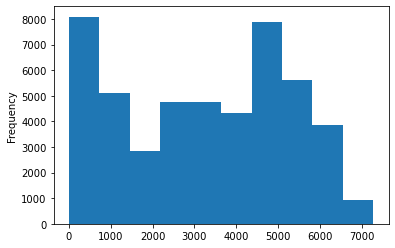

In [16]:
traffic['traffic_volume'].plot.hist()
plt.show()

In [17]:
traffic['traffic_volume'].describe()

count    48204.000000
mean      3259.818355
std       1986.860670
min          0.000000
25%       1193.000000
50%       3380.000000
75%       4933.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [61]:
traffic['date_time'] = pd.to_datetime(traffic['date_time'])
traffic_day = traffic[(traffic['date_time'].dt.hour>=7)&(traffic['date_time'].dt.hour<19)]
traffic_night = traffic[(traffic['date_time'].dt.hour>=19)|(traffic['date_time'].dt.hour<7)]
print(traffic_day.info())
print(traffic_night.info())
print(traffic.info())
traffic_day.shape+traffic_night.shape

<class 'pandas.core.frame.DataFrame'>
Int64Index: 23877 entries, 0 to 48198
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------               --------------  -----         
 0   holiday              23877 non-null  object        
 1   temp                 23877 non-null  float64       
 2   rain_1h              23877 non-null  float64       
 3   snow_1h              23877 non-null  float64       
 4   clouds_all           23877 non-null  int64         
 5   weather_main         23877 non-null  object        
 6   weather_description  23877 non-null  object        
 7   date_time            23877 non-null  datetime64[ns]
 8   traffic_volume       23877 non-null  int64         
dtypes: datetime64[ns](1), float64(3), int64(2), object(3)
memory usage: 1.8+ MB
None
<class 'pandas.core.frame.DataFrame'>
Int64Index: 24327 entries, 10 to 48203
Data columns (total 9 columns):
 #   Column               Non-Null Count  Dtype         
---  ------  

(23877, 9, 24327, 9)

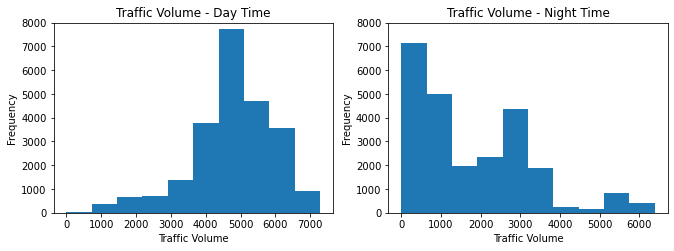

In [74]:
plt.figure(figsize=(11,3.5))

plt.subplot(1,2,1)
plt.hist(traffic_day.traffic_volume)
plt.title('Traffic Volume - Day Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])

plt.subplot(1,2,2)
plt.hist(traffic_night.traffic_volume)
plt.title('Traffic Volume - Night Time')
plt.xlabel('Traffic Volume')
plt.ylabel('Frequency')
plt.ylim([0,8000])
plt.show()

In [82]:
traffic_day['traffic_volume'].describe()

count    23877.000000
mean      4762.047452
std       1174.546482
min          0.000000
25%       4252.000000
50%       4820.000000
75%       5559.000000
max       7280.000000
Name: traffic_volume, dtype: float64

In [83]:
traffic_night.traffic_volume.describe()

count    24327.000000
mean      1785.377441
std       1441.951197
min          0.000000
25%        530.000000
50%       1287.000000
75%       2819.000000
max       6386.000000
Name: traffic_volume, dtype: float64

In [110]:
traffic_day.head()
traffic_day.groupby('month').mean()

,temp,rain_1h,snow_1h,clouds_all,traffic_volume
month,,,,,
1,265.483409,0.015080,0.000631,58.554108,4495.613727
2,266.663789,0.004019,0.000000,51.550459,4711.198394
3,273.619940,0.015839,0.000000,56.827811,4889.409560
4,279.661071,0.105343,0.000000,59.221525,4906.894305
5,289.282668,0.130863,0.000000,56.548825,4911.121609
6,294.576068,0.271121,0.000000,48.612374,4898.019566
7,296.785052,4.412258,0.000000,42.176619,4595.035744
8,295.119191,0.228113,0.000000,42.556892,4928.302035
9,292.520287,0.289807,0.000000,45.184112,4870.783145


In [137]:
traffic_day['day'] = traffic_day['date_time'].dt.day
traffic_day['hour'] = traffic_day['date_time'].dt.hour
traffic_day['dayofweek'] = traffic_day['date_time'].dt.dayofweek

In [140]:
traffic_day_month = traffic_day.groupby('month').mean()
traffic_day_day = traffic_day.groupby('day').mean()
traffic_day_hour = traffic_day.groupby('hour').mean()
traffic_day_dayofweek = traffic_day.groupby('dayofweek').mean()

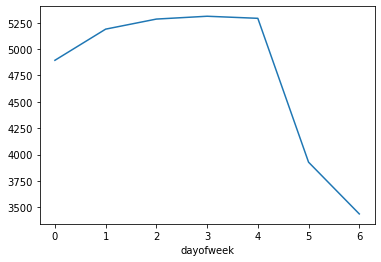

In [141]:
traffic_day_dayofweek['traffic_volume'].plot.line()
plt.show()